Methods used-

1. Most frequent for missing data.
2. K Means discretization for continuous variables.
3. IQR method for outliers.
4. Ordinal method for categorical encoding.
5. Vector unit length for feature scaling.

Conclusion-

1. XGBoost overall predicts very well with the upscaling.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv(r'C:\Users\911246\OneDrive - Cognizant\Desktop\Data-AI-ML\Disease Prediction Data.csv')
dataset=dataset.drop('id',axis=1)

In [3]:
print(dataset.shape)
dataset.head()

(5110, 11)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,apoplexy
0,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,Yes
1,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,NaN,never smoked,Yes
2,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,Yes
3,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,Yes
4,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,Yes


In [4]:
dataset['apoplexy'].value_counts()

No     4861
Yes     249
Name: apoplexy, dtype: int64

In [5]:
dataset.isnull().mean()

gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.039335
smoking_status       0.000000
apoplexy             0.000000
dtype: float64

In [6]:
vars_with_na=[var for var in dataset.columns if dataset[var].isnull().mean()>0]
vars_with_na

['bmi']

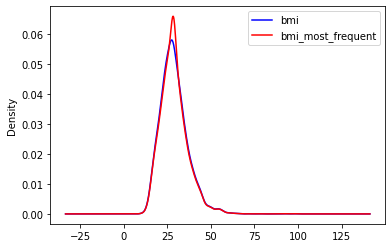

In [7]:
bmi_check=pd.DataFrame()
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')

bmi_check['bmi']=dataset['bmi']
bmi_check['bmi_most_frequent']=imputer.fit_transform(dataset[['bmi']])

fig_median=plt.figure()
ax1=fig_median.add_subplot(111)

bmi_check['bmi'].plot(kind='kde', ax=ax1, color='blue')
bmi_check['bmi_most_frequent'].plot(kind='kde', ax=ax1, color='red')


lines1, labels1 = ax1.get_legend_handles_labels()
ax1.legend(lines1, labels1, loc='best')

In [8]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
dataset['bmi']=imputer.fit_transform(dataset[['bmi']])

In [9]:
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,apoplexy
0,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,Yes
1,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,28.7,never smoked,Yes
2,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,Yes
3,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,Yes
4,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,Yes


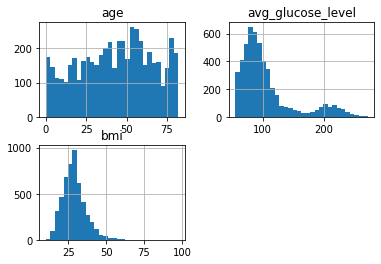

In [10]:
dataset[['age','avg_glucose_level','bmi']].hist(bins=30)
plt.show()

In [11]:
from sklearn.preprocessing import KBinsDiscretizer

In [12]:
disc = KBinsDiscretizer(n_bins=8, encode='ordinal', strategy='kmeans')
disc.fit(dataset[['age','avg_glucose_level','bmi']])
disc.bin_edges_

array([array([8.00000000e-02, 1.02214061e+01, 2.06677518e+01, 3.08177960e+01,
              4.13532988e+01, 5.14813609e+01, 6.12540167e+01, 7.18340319e+01,
              8.20000000e+01])                                               ,
       array([ 55.12      ,  73.76264244,  90.05907434, 107.55069837,
              132.02958822, 166.55401693, 198.76341563, 224.75189632,
              271.74      ])                                         ,
       array([10.3       , 20.90524654, 25.85010855, 30.30537228, 34.93593429,
              40.42036198, 48.6120336 , 69.32826087, 97.6       ])            ],
      dtype=object)

In [13]:
dataset[['age','avg_glucose_level','bmi']]=disc.transform(dataset[['age','avg_glucose_level','bmi']])

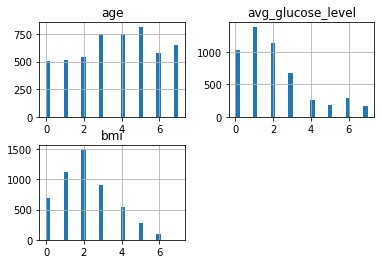

In [14]:
dataset[['age','avg_glucose_level','bmi']].hist(bins=30)
plt.show()

In [15]:
dataset.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,apoplexy
0,Male,6.0,No,Yes,Yes,Private,Urban,7.0,4.0,formerly smoked,Yes
1,Female,5.0,No,No,Yes,Self-employed,Rural,6.0,2.0,never smoked,Yes
2,Male,7.0,No,Yes,Yes,Private,Rural,2.0,3.0,never smoked,Yes
3,Female,4.0,No,No,Yes,Private,Urban,5.0,3.0,smokes,Yes
4,Female,7.0,Yes,No,Yes,Self-employed,Rural,5.0,1.0,never smoked,Yes


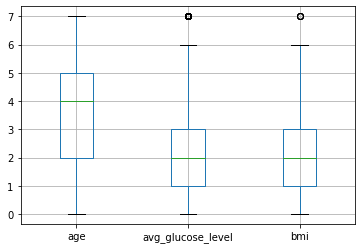

In [16]:
dataset[['age','avg_glucose_level','bmi']].boxplot()
plt.show()

In [17]:
def find_skewed_boundries(df,variable,distance):
    IQR=df[variable].quantile(0.75)-df[variable].quantile(0.25)
    
    lower_boundry=df[variable].quantile(0.25)-(IQR*distance)
    upper_boundry=df[variable].quantile(0.75)+(IQR*distance)  
    
    return upper_boundry,lower_boundry

In [18]:
Age_upperlimit,Age_lowerlimit=find_skewed_boundries(dataset,'age',1.5)
Age_upperlimit,Age_lowerlimit

(9.5, -2.5)

In [19]:
Agl_upperlimit,Agl_lowerlimit=find_skewed_boundries(dataset,'avg_glucose_level',1.5)
Agl_upperlimit,Agl_lowerlimit

(6.0, -2.0)

In [20]:
Bmi_upperlimit,Bmi_lowerlimit=find_skewed_boundries(dataset,'bmi',1.5)
Bmi_upperlimit,Bmi_lowerlimit

(6.0, -2.0)

In [21]:
dataset['age']=np.where(dataset['age']>Age_upperlimit,Age_upperlimit,
                        np.where(dataset['age']<Age_lowerlimit,Age_lowerlimit,dataset['age']))

In [22]:
dataset['avg_glucose_level']=np.where(dataset['avg_glucose_level']>Agl_upperlimit,Agl_upperlimit,
                        np.where(dataset['avg_glucose_level']<Agl_lowerlimit,Agl_lowerlimit,dataset['avg_glucose_level']))

In [23]:
dataset['bmi']=np.where(dataset['bmi']>Bmi_upperlimit,Bmi_upperlimit,
                        np.where(dataset['bmi']<Bmi_lowerlimit,Bmi_lowerlimit,dataset['bmi']))

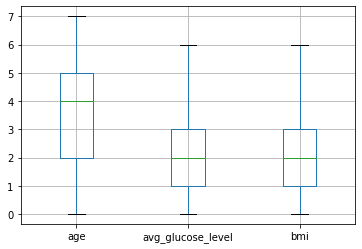

In [24]:
dataset[['age','avg_glucose_level','bmi']].boxplot()
plt.show()

In [25]:
dataset[['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status']].nunique()

gender            3
hypertension      2
heart_disease     2
ever_married      2
work_type         5
Residence_type    2
smoking_status    4
dtype: int64

In [26]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [27]:
print(pd.DataFrame(y))

        0
0     Yes
1     Yes
2     Yes
3     Yes
4     Yes
...   ...
5105   No
5106   No
5107   No
5108   No
5109   No

[5110 rows x 1 columns]


In [28]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [29]:
print(pd.DataFrame(y))

      0
0     1
1     1
2     1
3     1
4     1
...  ..
5105  0
5106  0
5107  0
5108  0
5109  0

[5110 rows x 1 columns]


In [30]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
x[:,[0,2,3,4,5,6,9]]=oe.fit_transform(x[:,[0,2,3,4,5,6,9]])

In [31]:
print(pd.DataFrame(x))

        0    1    2    3    4    5    6    7    8    9
0     1.0  6.0  0.0  1.0  1.0  2.0  1.0  6.0  4.0  1.0
1     0.0  5.0  0.0  0.0  1.0  3.0  0.0  6.0  2.0  2.0
2     1.0  7.0  0.0  1.0  1.0  2.0  0.0  2.0  3.0  2.0
3     0.0  4.0  0.0  0.0  1.0  2.0  1.0  5.0  3.0  3.0
4     0.0  7.0  1.0  0.0  1.0  3.0  0.0  5.0  1.0  2.0
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...
5105  0.0  7.0  1.0  0.0  1.0  2.0  1.0  1.0  2.0  2.0
5106  0.0  7.0  0.0  0.0  1.0  3.0  1.0  3.0  4.0  2.0
5107  0.0  3.0  0.0  0.0  1.0  3.0  0.0  1.0  3.0  2.0
5108  1.0  4.0  0.0  0.0  1.0  2.0  0.0  4.0  1.0  1.0
5109  0.0  4.0  0.0  0.0  1.0  0.0  1.0  1.0  2.0  0.0

[5110 rows x 10 columns]


In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [33]:
print(pd.DataFrame(y_train))

      0
0     0
1     0
2     0
3     1
4     0
...  ..
4083  0
4084  0
4085  0
4086  0
4087  0

[4088 rows x 1 columns]


In [34]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [35]:
x_train,y_train=sm.fit_resample(x_train,y_train)

In [36]:
print(pd.DataFrame(y_train))

      0
0     0
1     0
2     0
3     1
4     0
...  ..
7781  1
7782  1
7783  1
7784  1
7785  1

[7786 rows x 1 columns]


In [37]:
print(pd.DataFrame(y_test))

      0
0     1
1     0
2     0
3     0
4     0
...  ..
1017  0
1018  0
1019  0
1020  1
1021  0

[1022 rows x 1 columns]


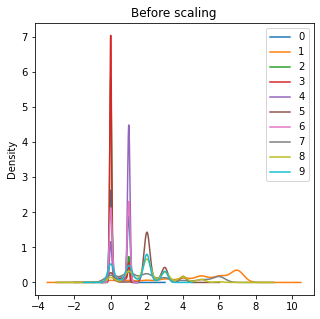

In [38]:
fig,ax5=plt.subplots(figsize=(5,5))
pd.DataFrame(x_train).plot(kind='kde', ax=ax5)
ax5.set_title('Before scaling')
lines5, labels5 = ax5.get_legend_handles_labels()
ax5.legend(lines5, labels5, loc='best')

In [39]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

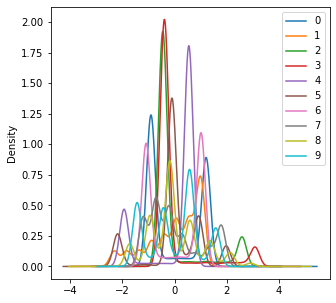

In [40]:
fig,ax6=plt.subplots(figsize=(5,5))
pd.DataFrame(x_train_scaled).plot(kind='kde', ax=ax6)
ax5.set_title('After scaling')
lines6, labels6 = ax6.get_legend_handles_labels()
ax6.legend(lines6, labels6, loc='best')

In [41]:
print(pd.DataFrame(x_train_scaled))

             0         1         2         3         4         5         6  \
0    -0.907124 -0.888579 -0.451747 -0.388600  0.548167 -0.102796 -1.093308   
1    -0.907124 -0.888579 -0.451747 -0.388600  0.548167 -0.102796 -1.093308   
2     1.214450  0.059489 -0.451747 -0.388600  0.548167 -0.102796 -1.093308   
3    -0.907124  1.007557 -0.451747 -0.388600  0.548167  0.937995 -1.093308   
4     1.214450  1.007557 -0.451747 -0.388600  0.548167 -0.102796  1.018713   
...        ...       ...       ...       ...       ...       ...       ...   
7781 -0.866717  0.524494 -0.451747 -0.388600  0.548167 -2.184377  0.978488   
7782 -0.907124  1.007557 -0.451747 -0.388600  0.046331 -0.102796 -1.093308   
7783 -0.907124 -0.554182 -0.451747 -0.388600  0.548167 -0.102796 -1.093308   
7784  0.116132  1.007557 -0.451747  1.292386  0.548167 -0.102796 -1.093308   
7785 -0.907124  1.007557  1.013919 -0.388600 -0.741852  0.397902  1.018713   

             7         8         9  
0    -1.210876  1.368255 -

In [42]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=500, criterion='entropy', random_state=3)
classifier.fit(x_train_scaled,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500, random_state=3)

In [43]:
y_pred=classifier.predict(x_test_scaled)
from sklearn.metrics import confusion_matrix, accuracy_score
cm=confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[957  11]
 [ 53   1]]


0.9373776908023483

In [44]:
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 1]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 1]
 [0 0]]


In [45]:
print(pd.DataFrame(y_pred).apply(pd.value_counts))

      0
0  1010
1    12


In [46]:
print(pd.DataFrame(y_test).apply(pd.value_counts))

     0
0  968
1   54


In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score,f1_score,recall_score,roc_auc_score
accuracies = cross_val_score(estimator = classifier,X=x_train_scaled,y=y_train,cv=10)
Precision = precision_score(y_true=y_test,y_pred=y_pred)
f1_score = f1_score(y_true=y_test,y_pred=y_pred)
recall_score = recall_score(y_true=y_test,y_pred=y_pred)
roc_auc_score = roc_auc_score(y_true=y_test,y_score=y_pred)

print("Accuracy: {:.2f}%".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f}%".format(accuracies.std()*100))
print("Precision: {:.2f}%".format(Precision.mean()*100))
print("f1_score: {:.2f}".format(f1_score))
print("recall_score: {:.2f}".format(recall_score))
print("roc_auc_score: {:.2f}%".format(roc_auc_score.mean()*100))

Accuracy: 97.05%
Standard Deviation: 6.12%
Precision: 8.33%
f1_score: 0.03
recall_score: 0.02
roc_auc_score: 50.36%


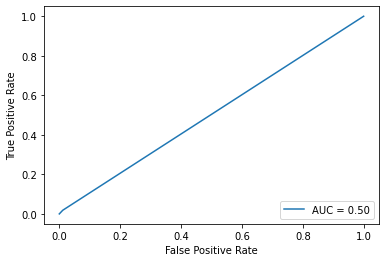

In [48]:
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(y_test,y_pred, pos_label=1)
roc_auc = metrics.auc(fpr,tpr)
display = metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc)
display.plot()
plt.show()